# import packages

In [43]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz

In [44]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

from sklearn import metrics
import matplotlib.pyplot as plt

In [45]:
# Load the dataset
#from sklearn.datasets import fetch_openml
#mnist = fetch_openml(name = 'mnist_784')

# download dataset

In [46]:
import tensorflow as tf 
#train_x=mnist.data :train image data
#train_y=mnist.traget :train label data
#test_x=mnist.data :test image data
#test_y=mnist.traget :test label data
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

In [47]:
train_x.shape

(60000, 28, 28)

In [48]:
test_x.shape

(10000, 28, 28)

In [49]:
#reshape to 784
#28*28 pixel
x = train_x.reshape(60000,28*28)
x_test = test_x.reshape(10000,28*28)

In [50]:
y = train_y.astype('int32')
y_test=test_y.astype('int32')

In [51]:
# Standardise data by dividing by 255
#x_train=train_x/255.0
#x_test=test_x/255.0

In [52]:
SEED=1000

In [53]:
#set validation dataset
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=1/6, random_state=SEED)

In [54]:
print ("Training data: ", x_train.shape, y_train.shape)
print ("Test data: ", x_test.shape, y_test.shape)
print ("Validation data: ", x_val.shape, y_val.shape)

Training data:  (50000, 784) (50000,)
Test data:  (10000, 784) (10000,)
Validation data:  (10000, 784) (10000,)


# decision tree

In [55]:
model_DT= tree.DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=None)
model_DT.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [56]:
print("At depth:", model_DT.tree_.max_depth)
print("Decision Tree Accuracy on the Train set : ", model_DT.score(x_train, y_train))
print("Decision Tree Accuracy on the Test set : ", model_DT.score(x_test, y_test))
print("Decision Tree Accuracy on the Validation set:", model_DT.score(x_val, y_val))

At depth: 22
Decision Tree Accuracy on the Train set :  1.0
Decision Tree Accuracy on the Test set :  0.8822
Decision Tree Accuracy on the Validation set: 0.8757


In [57]:
dot_data = tree.export_graphviz(model_DT,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                impurity=False,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("mnist decision tree - default", view = True)

'mnist decision tree - default.pdf'

# modify criterion and splitter

In [86]:
clf = DecisionTreeClassifier(criterion='entropy',splitter='random')
clf.fit(x_train, y_train)
print("Decision Tree Accuracy on the Train set : ", clf.score(x_train, y_train))
print("Decision Tree Accuracy on the Test set : ", clf.score(x_test, y_test))
print("Decision Tree Accuracy on the Validation set:", clf.score(x_val, y_val))

Decision Tree Accuracy on the Train set :  1.0
Decision Tree Accuracy on the Test set :  0.8824
Decision Tree Accuracy on the Validation set: 0.8701


In [83]:
clf = DecisionTreeClassifier(criterion='gini',splitter='best')
clf.fit(x_train, y_train)
print("Decision Tree Accuracy on the Train set : ", clf.score(x_train, y_train))
print("Decision Tree Accuracy on the Test set : ", clf.score(x_test, y_test))
print("Decision Tree Accuracy on the Validation set:", clf.score(x_val, y_val))

Decision Tree Accuracy on the Train set :  1.0
Decision Tree Accuracy on the Test set :  0.874
Decision Tree Accuracy on the Validation set: 0.8723


In [84]:
clf = DecisionTreeClassifier(criterion='gini',splitter='random')
clf.fit(x_train, y_train)
print("Decision Tree Accuracy on the Train set : ", clf.score(x_train, y_train))
print("Decision Tree Accuracy on the Test set : ", clf.score(x_test, y_test))
print("Decision Tree Accuracy on the Validation set:", clf.score(x_val, y_val))

Decision Tree Accuracy on the Train set :  1.0
Decision Tree Accuracy on the Test set :  0.8717
Decision Tree Accuracy on the Validation set: 0.8646


# modify max_depth

In [62]:
# Build model and append scores to a list
dt_depths = range(2,50,2)

# Stored in a list
dt_scores_train = []
dt_scores_test = []
dt_scores_val=[]

# Create and fit the model
for d in dt_depths:
  clf = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=d)
  clf.fit(x_train, y_train)
    
# Append the scores in the list
  score = clf.score(x_train, y_train)
  dt_scores_train.append(score)
  print(d)
  print(score)

  score = clf.score(x_test, y_test)
  dt_scores_test.append(score)
  print(score)
    
  score = clf.score(x_val, y_val)
  dt_scores_val.append(score)
  print(score)

2
0.33542
0.337
0.327
4
0.61114
0.6142
0.5981
6
0.7554
0.7485
0.7386
8
0.84786
0.8369
0.8252
10
0.91508
0.8699
0.8606
12
0.9696
0.8849
0.8761
14
0.99192
0.8808
0.8749
16
0.99834
0.8826
0.874
18
0.99952
0.8839
0.8724
20
0.99988
0.882
0.8726
22
1.0
0.8792
0.8727
24
1.0
0.8826
0.8753
26
1.0
0.8789
0.8712
28
1.0
0.8784
0.8698
30
1.0
0.8794
0.8725
32
1.0
0.8808
0.8722
34
1.0
0.8811
0.8726
36
1.0
0.8811
0.8745
38
1.0
0.8808
0.8721
40
1.0
0.8806
0.8715
42
1.0
0.8824
0.8731
44
1.0
0.8813
0.8731
46
1.0
0.8783
0.875
48
1.0
0.8794
0.871


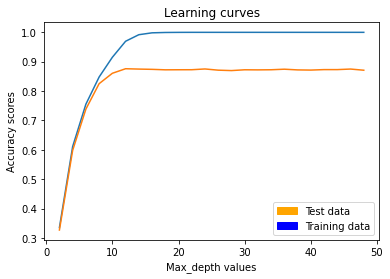

In [73]:
# Plot learning curves from scores
fig, ax = plt.subplots()
ax.plot(dt_depths, dt_scores_train)
ax.plot(dt_depths, dt_scores_val)

plt.xlabel("Max_depth values")
plt.ylabel("Accuracy scores")
plt.title("Learning curves")

import matplotlib.patches as mpatches
orange = mpatches.Patch(color='orange', label='Test data')
blue = mpatches.Patch(color='blue', label='Training data')
plt.legend(handles=[orange, blue])

# modify min sample split

In [88]:
# Build model and append scores to a list
dt_ns = range(2,20,1)

# Stored in a list
dt_scores_train = []
dt_scores_test = []
dt_scores_val=[]

# Create and fit the model
for n in dt_ns:
  clf = DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_split=n)
  clf.fit(x_train, y_train)
    
# Append the scores in the list
  score = clf.score(x_train, y_train)
  dt_scores_train.append(score)
  print(n)
  print(score)

  score = clf.score(x_test, y_test)
  dt_scores_test.append(score)
  print(score)
    
  score = clf.score(x_val, y_val)
  dt_scores_val.append(score)
  print(score)

2
1.0
0.8818
0.8733
3
0.99476
0.8817
0.8723
4
0.99072
0.8794
0.8732
5
0.98644
0.8772
0.8725
6
0.9821
0.8782
0.8722
7
0.97862
0.8798
0.873
8
0.97542
0.8789
0.8715
9
0.97238
0.8781
0.8718
10
0.96942
0.877
0.8715
11
0.9665
0.8772
0.8728
12
0.96292
0.8768
0.8717
13
0.96006
0.876
0.8706
14
0.95724
0.8772
0.8725
15
0.95448
0.876
0.8721
16
0.95154
0.8752
0.8712
17
0.94966
0.8761
0.8731
18
0.94744
0.8757
0.8706
19
0.94584
0.8755
0.8697


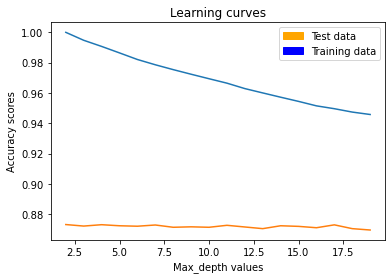

In [89]:
# Plot learning curves from scores
fig, ax = plt.subplots()
ax.plot(dt_ns, dt_scores_train)
ax.plot(dt_ns, dt_scores_val)

plt.xlabel("Max_depth values")
plt.ylabel("Accuracy scores")
plt.title("Learning curves")

import matplotlib.patches as mpatches
orange = mpatches.Patch(color='orange', label='Test data')
blue = mpatches.Patch(color='blue', label='Training data')
plt.legend(handles=[orange, blue])